i:0, Train Loss:319.877350, Test Loss:335.534210
i:200, Train Loss:51.062717, Test Loss:52.868839
i:400, Train Loss:44.026741, Test Loss:44.208660
i:600, Train Loss:40.691517, Test Loss:40.308956
i:800, Train Loss:37.842648, Test Loss:37.103394
i:1000, Train Loss:35.381023, Test Loss:34.371243
i:1200, Train Loss:33.253674, Test Loss:32.034031
i:1400, Train Loss:31.415195, Test Loss:30.035017
i:1600, Train Loss:29.826368, Test Loss:28.326626
i:1800, Train Loss:28.453285, Test Loss:26.868040
i:2000, Train Loss:27.266645, Test Loss:25.624058


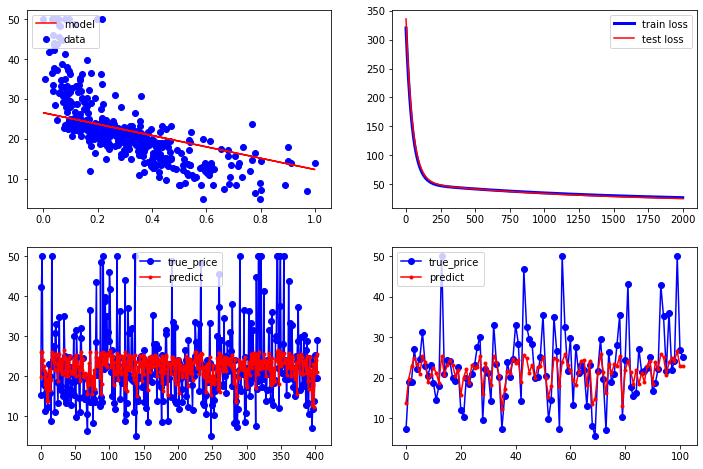

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
boston_housing=tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

x_train=train_x[:,12]
x_train=(x_train-x_train.min(axis=0))/(x_train.max(axis=0)-x_train.min(axis=0))
y_train=train_y

x_test=test_x[:,12]
x_test=(x_test-x_test.min(axis=0))/(x_test.max(axis=0)-x_test.min(axis=0))
y_test=test_y

#设置超参数
learn_rate=0.01
iter =2000
display_step=200

np.random.seed(612)  #随机种子
w = tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())

#记录误差列表
mse_train=[]
mse_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        pred_train = w*x_train+b
        loss_train = 0.5*tf.reduce_mean(tf.square(y_train-pred_train))
        
        pred_test = w*x_test+b
        loss_test = 0.5*tf.reduce_mean(tf.square(y_test-pred_test))
        
    mse_train.append(loss_train)
    mse_test.append(loss_test)
    
    dL_dw,dL_db = tape.gradient(loss_train,[w,b])
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
    if i % display_step == 0:
        print("i:%i, Train Loss:%f, Test Loss:%f" % (i,loss_train,loss_test))
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.scatter(x_train,y_train,color='blue',label="data")
plt.plot(x_train,pred_train,color='red',label="model")
plt.legend(loc='upper left')

plt.subplot(222)
plt.plot(mse_train,color='blue',linewidth=3,label='train loss')
plt.plot(mse_test,color='red',linewidth=1.5,label='test loss')
plt.legend(loc='upper right')

plt.subplot(223)
plt.plot(y_train,color='blue',marker='o',label='true_price')
plt.plot(pred_train,color='red',marker='.',label='predict')
plt.legend()

plt.subplot(224)
plt.plot(y_test,color='blue',marker='o',label='true_price')
plt.plot(pred_test,color='red',marker='.',label='predict')
plt.legend()

plt.show()
